# Mobile Price Classification using Keras


In this notebook, I will make my first neural network(ANN) using keras framework. The data is about mobile phones of various companies and consist of  features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price.

## 1. Import libraries and Data processing
The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes. Before feeding data to our neural network we need it in a specific way so we need to process it accordingly. The preprocessing of data depends on the type of data. Here we will  handle image dataset. Let’s start the coding part:

In [18]:
#libraries import
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\tenso

In [11]:
#dataset import
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
#split dataset
X = dataset.iloc[:,:20]
y = dataset.iloc[:, 20:21]

Next step is to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values.

In [10]:
# Normalizing the data
sc =  StandardScaler()
X = sc.fit_transform(X)

Next step is to one hot encode the classes. One hot encoding is a process to convert integer classes into binary values.

In [15]:
# OneHotEncoder
one = OneHotEncoder()
y = one.fit_transform(y).toarray()

C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [16]:
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

__Now our dataset is processed and ready to feed in the neural network.__

Generally, it is better to split data into training and testing data. Training data is the data on which we will train our neural network. Test data is used to check our trained neural network. This data is totally new for our neural network and if the neural network performs well on this dataset, it shows that there is no overfitting. Read more about this here.


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

This will split our dataset into training and testing. Training data will have 90% samples and test data will have 10% samples. This is specified by the test_size argument.


## 2. Building Neural Network

In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.


In [19]:
#Building neural network
model = Sequential()

model.add(Dense(16, input_dim = 20, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#Compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

## 3. Training model

We will specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.

In [39]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
1800/1800 [==============================] - 0s 34us/step - loss: 0.0551
Epoch 2/100
1800/1800 [==============================] - 0s 36us/step - loss: 0.0541
Epoch 3/100
1800/1800 [==============================] - 0s 60us/step - loss: 0.0575
Epoch 4/100
1800/1800 [==============================] - 0s 51us/step - loss: 0.0533
Epoch 5/100
1800/1800 [==============================] - 0s 40us/step - loss: 0.0528
Epoch 6/100
1800/1800 [==============================] - 0s 44us/step - loss: 0.0519
Epoch 7/100
1800/1800 [==============================] - 0s 44us/step - loss: 0.0508
Epoch 8/100
1800/1800 [==============================] - 0s 49us/step - loss: 0.0493
Epoch 9/100
1800/1800 [==============================] - 0s 36us/step - loss: 0.0492
Epoch 10/100
1800/1800 [==============================] - 0s 36us/step - loss: 0.0483
Epoch 11/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.0476
Epoch 12/100
1800/1800 [==============================] - 0s 36

1800/1800 [==============================] - 0s 42us/step - loss: 0.0127
Epoch 97/100
1800/1800 [==============================] - 0s 33us/step - loss: 0.0121
Epoch 98/100
1800/1800 [==============================] - 0s 27us/step - loss: 0.0118
Epoch 99/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.0120
Epoch 100/100
1800/1800 [==============================] - 0s 29us/step - loss: 0.0119


In [29]:
# Prediction
y_pred = model.predict(X_test)
print(y_pred)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

[[9.42019582e-01 5.79804070e-02 4.24564870e-13 3.19895280e-16]
 [3.78914469e-33 4.12623551e-16 2.13963780e-09 1.00000000e+00]
 [8.16772163e-01 1.83227822e-01 1.73683151e-11 2.80377880e-13]
 [9.99788344e-01 2.11611565e-04 2.08135832e-19 6.37216323e-21]
 [4.84794115e-11 2.41767298e-02 9.75747347e-01 7.59922841e-05]
 [7.50475228e-01 2.49524727e-01 2.14354623e-09 1.03480002e-11]
 [4.24883241e-16 1.30013883e-04 5.47533214e-01 4.52336758e-01]
 [9.99972463e-01 2.75016264e-05 1.12128969e-20 9.72165421e-23]
 [1.59578022e-07 5.48363626e-01 4.51506495e-01 1.29708860e-04]
 [1.43061287e-03 9.98569250e-01 9.49782475e-08 7.67727062e-11]
 [9.98557031e-01 1.44301506e-03 4.11754759e-16 2.80370346e-18]
 [1.01880360e-32 9.69662244e-14 9.04656588e-07 9.99999046e-01]
 [9.99845266e-01 1.54730747e-04 1.41315577e-18 1.50957780e-20]
 [5.66153670e-23 3.93765420e-09 2.25530079e-04 9.99774516e-01]
 [1.74922584e-15 6.21056592e-04 9.90228772e-01 9.15019121e-03]
 [1.62689127e-02 9.83730674e-01 3.70461805e-07 4.346075

In [37]:
# Accuracy
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is '+str(a*100)+'%')

Accuracy is 93.5%


We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. We can do this by changing fit function as:

In [41]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 74us/step - loss: 0.0121 - val_loss: 0.1537
Epoch 2/100
1800/1800 [==============================] - 0s 58us/step - loss: 0.0116 - val_loss: 0.1480
Epoch 3/100
1800/1800 [==============================] - 0s 34us/step - loss: 0.0112 - val_loss: 0.1497
Epoch 4/100
1800/1800 [==============================] - 0s 51us/step - loss: 0.0111 - val_loss: 0.1493
Epoch 5/100
1800/1800 [==============================] - 0s 33us/step - loss: 0.0108 - val_loss: 0.1515
Epoch 6/100
1800/1800 [==============================] - 0s 38us/step - loss: 0.0106 - val_loss: 0.1528
Epoch 7/100
1800/1800 [==============================] - 0s 62us/step - loss: 0.0106 - val_loss: 0.1482
Epoch 8/100
1800/1800 [==============================] - 0s 42us/step - loss: 0.0105 - val_loss: 0.1500
Epoch 9/100
1800/1800 [==============================] - 0s 33us/step - loss: 0.0102 - val_loss: 0.1536
Epoch 10/100
1800

1800/1800 [==============================] - 0s 61us/step - loss: 0.0036 - val_loss: 0.1533
Epoch 79/100
1800/1800 [==============================] - 0s 39us/step - loss: 0.0036 - val_loss: 0.1517
Epoch 80/100
1800/1800 [==============================] - 0s 42us/step - loss: 0.0035 - val_loss: 0.1528
Epoch 81/100
1800/1800 [==============================] - 0s 35us/step - loss: 0.0034 - val_loss: 0.1559
Epoch 82/100
1800/1800 [==============================] - 0s 47us/step - loss: 0.0037 - val_loss: 0.1587
Epoch 83/100
1800/1800 [==============================] - 0s 102us/step - loss: 0.0033 - val_loss: 0.1548
Epoch 84/100
1800/1800 [==============================] - 0s 35us/step - loss: 0.0032 - val_loss: 0.1579
Epoch 85/100
1800/1800 [==============================] - 0s 32us/step - loss: 0.0031 - val_loss: 0.1567
Epoch 86/100
1800/1800 [==============================] - 0s 36us/step - loss: 0.0031 - val_loss: 0.1574
Epoch 87/100
1800/1800 [==============================] - 0s 32us/s

Our model is working fine. Now we will visualize training and validation losses and accuracies.

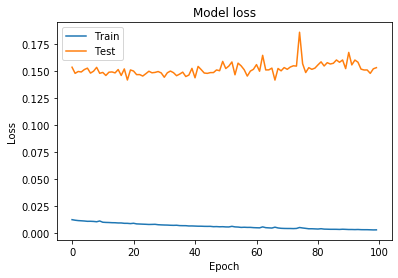

In [45]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()